# Jan 26 Lecture support code

In lecture today, we talked about interpretations of the coefficients of a linear regression model.

In this notebook, we will build a linear regression model using a sci-kit learn implementation on the `autompg` dataset.  Then, we will look at the coefficients both with and without any preprocessing.

In [1]:
import pandas as pd

predictor_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
label_col = 'mpg'

cars = pd.read_csv('data/auto-mpg.csv', usecols=predictor_cols + [label_col])

# Some subset of the rows have horsepower = '?', so we remove those rows and cast to numeric column
cars = cars[cars.horsepower != '?']
cars.horsepower = cars.horsepower.astype('float')

cars

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


In [2]:
# Here, we train a linear regression model on the full dataset
# We aren't splitting into training, validation, or test, because we are just illustrating
# the interpretation of a trained model.

from sklearn.linear_model import LinearRegression

X = cars[predictor_cols]
y = cars[label_col]

model = LinearRegression()
model.fit(X, y)


LinearRegression()

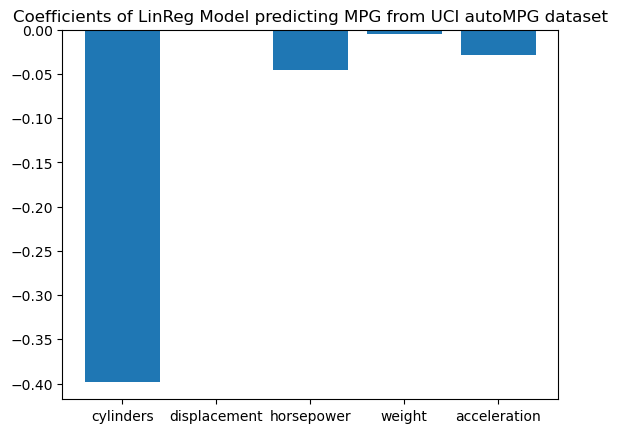

In [3]:
# Let's plot the coefficients
from matplotlib import pyplot as plt
plt.bar(predictor_cols, model.coef_)
plt.title("Coefficients of LinReg Model predicting MPG from UCI autoMPG dataset")
display()


## What does this tell us?

The plot above shows the coefficients of the five predictor variables.  All five features are negatively correlated with the target - as they go up, the MPG goes down, which makes sense.  Cars typically have a tradeoff between power/size and mileage.

The actual numbers tell us that when the corresponding feature goes up by one, the MPG goes down by the indicated amount.  For example, when horsepower goes up by one, the MPG goes down, on average according to our model, by about 0.05.  This suggests that the most important feature, by far, is cylinders.

Is that true?  One issue with that statement is that changing from 6 to 7 cylinders (well 8, but you get the idea) is a much bigger change than changing from 100 to 101 horsepower.  We need to apply some standardization to the columns so they are more easily comparable.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# The sklearn StandardScaler can transform a whole database at once, scaling each column individually
standardX = scaler.fit_transform(X)
standardX

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.86401356, -0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.86401356, -0.72157372, -0.58450051, -0.30364091,  1.40043312]],
      shape=(392, 5))

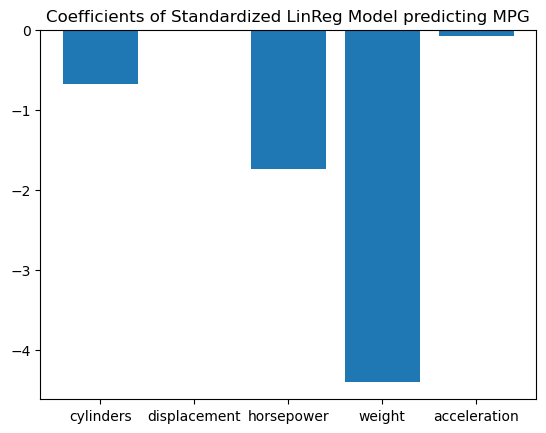

In [5]:
# Let's make a new regression model and look at the coefficients
standard_model = LinearRegression()
standard_model.fit(standardX, y)

plt.bar(predictor_cols, standard_model.coef_)
plt.title("Coefficients of Standardized LinReg Model predicting MPG")
display()


## Well, what does *this* tell us?

This second plot disagrees with the first plot.  After standardizing our data, it suggests that, according to our model, the *weight* is the most important attribute for predicting a change in MPG.

The directions of the coefficients are all the same, but the quantitites are very different.

These quantities tell us how much MPG decreases when you move one standard deviation up in each respective column.